# N-Queens Problem

Author: Guillermo Alonso Alonso de Linaje

In this notebook we are going to solve a toy version of the N-Queens problem. The porpose is to place N queens in a board of NxN and any queen can't be attack by any other. We are going work with a 4x4 board where a queen is alredy placed: 

![Initial](https://github.com/KetpuntoG/Notebooks-del-canal/blob/master/N-Queens%20Problem/Im%C3%A1genes/TableroInicial.png?raw=true)

Obviously, by having placed a queen, we reduce the number of unknowns and this is necessary to be able to run it on a quantum computer (due to its current small capacity). After this operation, we can see that we only need work with 6 unknow qubits. The problem would be as follows:

![Placed](https://github.com/KetpuntoG/Notebooks-del-canal/blob/master/N-Queens%20Problem/Im%C3%A1genes/ReinaColocada.png?raw=true)

First, we have to check that there is only one queen in each row, therefore:
- Q0 + Q1 = 1
- Q2 + Q3 = 1
- Q4 + Q5 = 1

Where Qi represent the qubit that save the information of the i-cell.
Likewise, we have to check it for the columns:
- Q0 = 1
- Q2 + Q4 = 1
- Q1 + Q3 + Q5 = 1

Finally, for the diagonals, we find two more restrictions:

- Q0 + Q2 < 2
- Q1 + Q2 < 2

(Diagonals could have 0 or 1 Queen)



In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [3]:
def f_simple_sum(circ, lista):
    
    #This function adds two elements and stores it in a third one
    #It's usefull for Qi + Qj = 1 restrictions. 
    
    for array in lista:
        circ.cx(array[0], array[2])
        circ.cx(array[1], array[2])
        circ.barrier(range(numero_qubits))
        
        
def f_sum_not_two(circ, lista):
    
    #This function store in the solution qubit the value |1> if the sum of the
    #two first qubits is 0 or 1. We will use it for Qi + Qj < 2
    
    for array in lista:
        circ.x(array[2])
        circ.ccx(array[0],array[1],array[2])
        circ.barrier(range(numero_qubits))

        
def f_sum_three_is_one(circ, lista):
    
    # This function check that the sum of the first three qubits is one.
    # We will use it for de Qi + Qj +Qk = 1
    
    for array in lista:
        
        circ.cx(array[0],array[3])
        circ.cx(array[1],array[3])
        circ.cx(array[2],array[3])
        circ.ccx(array[0],array[1],array[4])
        circ.ccx(array[2],array[4],array[3])
        circ.ccx(array[0],array[1],array[4])
        circ.barrier(range(numero_qubits))

    
def f_check_all_one(circ,lista):
    
    # if the first len(lista)/2 qubits are |1>, this function mark the
    # qubit solution with a |1> too.
    # It's usefull for check that all previous conditions are met.
    
    for array in lista:
        circ.ccx(array[0],array[1],array[8])
        for i in range(6):
            circ.ccx(array[2 + i], array[8 + i], array[9 + i])
        
        circ.cx(array[-2], array[-1])
        
        for i in range(5,-1,-1):
            circ.ccx(array[2 + i], array[8 + i], array[9 + i])
        circ.ccx(array[0],array[1],array[8])
        circ.barrier(range(numero_qubits))


def add_grover(circ, free):
    
    # with this function we add the Grover operator
    
    lista = list(range(6)) # list of unknow qubits
    
    firts_free_qubit = free
            
    circ.h(lista)
    circ.x(lista)
    circ.barrier(range(numero_qubits))

    circ.ccx(lista[0], lista[1], firts_free_qubit)
    
    for i in range(len(lista) - 3):
        circ.ccx(lista[i+2],firts_free_qubit + i, firts_free_qubit + 1 + i)
        j = i
        
    circ.cz(firts_free_qubit + 1 + j,lista[-1])
    
    for i in range(len(lista) - 4, -1, -1):
        circ.ccx(lista[i+2],firts_free_qubit + i, firts_free_qubit + 1 + i)
    
    circ.ccx(lista[0], lista[1], firts_free_qubit)
    circ.barrier(range(numero_qubits))

    circ.x(lista)
    circ.h(lista)
    circ.barrier(range(numero_qubits))


    return 0

In [4]:
simple_sum = [ # first qubits plus the second, and we store the solution in the third qubit
    [0,1,6],
    [2,3,7],
    [4,5,8],
    [2,4,9]
]

diagonals = [ # third qubit = 1 iff the sum of the others is less than 2
    [0,2,10],
    [1,2,11]
]

three_sum = [ # fourth qubit = 1 iff the sum of the first three qubits is 1.
    [1,3,5,12,13]  # the last qubits is an auxiliar qubit.
]
numero_qubits = 26 # number of qubits

circ = QuantumCircuit(numero_qubits, 6)

f_simple_sum(circ,simple_sum)
f_sum_not_two(circ, diagonals)
f_sum_three_is_one(circ, three_sum)


criteria_solutions = [[0,6,7,8,9,10,11,12, 13,14,15,16,17,18,19,20]] # 8-7-1
          # 0~7: the qubits we want to check if are |1>
          # 8~14: ancillas
          # 15: qubit that store the answer
            
            
f_check_all_one(circ, criteria_solutions)

circ.z(20) # if the output of the previous function is |1>, we change the sign of the state

circ.barrier(range(numero_qubits))

# Here, we are going to undo the previous operations because we have to reset all auxiliar qubits to |0>
f_check_all_one(circ, criteria_solutions)
f_sum_three_is_one(circ, three_sum)
f_sum_not_two(circ, diagonals)
f_simple_sum(circ,simple_sum)

circ.barrier(range(numero_qubits))


add_grover(circ, 22)

circ.draw()

░            ░            ░            ░            ░      »
 q_0: ──■────────░────────────░────────────░────────────░────────■───░──────»
        │        ░            ░            ░            ░        │   ░      »
 q_1: ──┼────■───░────────────░────────────░────────────░────────┼───░──────»
        │    │   ░            ░            ░            ░        │   ░      »
 q_2: ──┼────┼───░───■────────░────────────░───■────────░────────■───░──────»
        │    │   ░   │        ░            ░   │        ░        │   ░      »
 q_3: ──┼────┼───░───┼────■───░────────────░───┼────────░────────┼───░──────»
        │    │   ░   │    │   ░            ░   │        ░        │   ░      »
 q_4: ──┼────┼───░───┼────┼───░───■────────░───┼────■───░────────┼───░──────»
        │    │   ░   │    │   ░   │        ░   │    │   ░        │   ░      »
 q_5: ──┼────┼───░───┼────┼───░───┼────■───░───┼────┼───░────────┼───░──────»
      ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░   │    │   ░        │   ░      »
 q_6: ┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░───┼────┼───░────────┼───░──────»
      └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░   │    │   ░        │   ░      »
 q_7: ───────────░─┤ X ├┤ X ├─░───┼────┼───░───┼────┼───░────────┼───░──────»
                 ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░   │    │   ░        │   ░      »
 q_8: ───────────░────────────░─┤ X ├┤ X ├─░───┼────┼───░────────┼───░──────»
                 ░            ░ └───┘└───┘ ░ ┌─┴─┐┌─┴─┐ ░        │   ░      »
 q_9: ───────────░────────────░────────────░─┤ X ├┤ X ├─░────────┼───░──────»
                 ░            ░            ░ └───┘└───┘ ░ ┌───┐┌─┴─┐ ░      »
q_10: ───────────░────────────░────────────░────────────░─┤ X ├┤ X ├─░──────»
                 ░            ░            ░            ░ └───┘└───┘ ░ ┌───┐»
q_11: ───────────░────────────░────────────░────────────░────────────░─┤ X ├»
                 ░            ░            ░            ░            ░ └───┘»
q_12: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_13: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_14: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_15: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_16: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_17: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_18: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_19: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_20: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_21: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_22: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_23: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_24: ───────────░────────────░────────────░────────────░────────────░──────»
                 ░            ░            ░            ░            ░      »
q_25: ───────────░────────────░────────

In [15]:
circuito = QuantumCircuit(numero_qubits,6)

# we create the superposition of all possible states
circuito.h(range(6))

# We are working with 2⁶ states (64), so the algorithm will be repeated sqrt(64) = 8 times
for _ in range(8):
    circuito += circ
circuito.measure(range(6),range(6))

In [22]:
#circuito.draw(output = 'mpl')

In [16]:
#device = Aer.get_backend('qasm_simulator')

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_qasm_simulator')


ibmqfactory.load_account:WARNING:2020-06-21 11:33:48,664: Credentials are already in use. The existing account in the session will be replaced.


In [17]:

from qiskit.tools.monitor import job_monitor

job = execute(circuito, backend = device, shots = 1)
print(job.job_id())
job_monitor(job)
result = job.result().get_counts()

5eef299c9a0426001a6a09ca
Job Status: job has successfully run


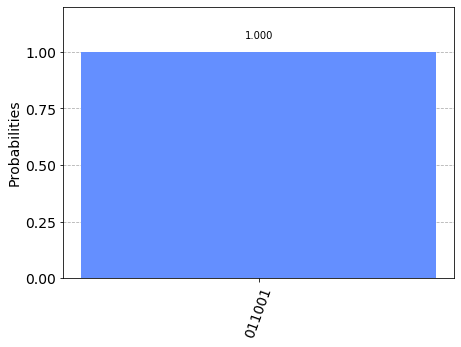

In [18]:
plot_histogram(result)

In [19]:
resultado = result.copy()
valor = resultado.popitem()[0]
valor

'011001'

In [20]:
import numpy as np

def plot(valor):
    matriz = np.zeros([4,4])
    matriz[2][0] = 1
    matriz[0][1] = valor[-1]
    matriz[0][3] = valor[-2]
    matriz[1][2] = valor[-3]
    matriz[1][3] = valor[-4]
    matriz[3][2] = valor[-5]
    matriz[3][3] = valor[-6]
    
    print(" --------------- ")
    for i in range(4):
        print("|", end = "")
        for j in range(4):
            
            if matriz[i][j] == 0:
                
                print("   |", end = "")
            else:
                print(" X |" ,end = "")
        print()
        print(" --------------- ")
        
plot(valor)


 --------------- 
|   | X |   |   |
 --------------- 
|   |   |   | X |
 --------------- 
| X |   |   |   |
 --------------- 
|   |   | X |   |
 --------------- 


As we can see, with a single shot of the program we have found the desired solution.
If there is any doubt, please contact me:

canalket.g@gmail.com